## SVM on 10 different classes audios:

###### Name: Qian Shi (qs2164)

In [1]:
import numpy as np
import pandas as pd
from sklearn import svm
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from datetime import datetime

#### Load train and test data:

In [2]:
train_featu = pd.read_csv("x_train.csv")
train_label = pd.read_csv("y_train.csv")
train_label = np.array(train_label).reshape(len(train_label), )

test_featu = pd.read_csv("x_test.csv")
test_label = pd.read_csv("y_test.csv")
test_label = np.array(test_label).reshape(len(test_label), )

In [3]:
print(train_featu.shape)
print(train_label.shape)

(771, 193)
(771,)


In [4]:
train_featu.head(n=5)

,0,1,2,3,4,5,6,7,8,9,...,183,184,185,186,187,188,189,190,191,192
0,-202.558343,154.413094,6.078960,18.352162,16.465381,30.480092,14.401530,20.897098,18.563433,14.471047,...,14.456826,17.973174,16.108079,31.297310,-0.002555,0.028054,-0.027136,-0.030276,0.006397,-0.004940
1,-213.265368,1.988407,-48.650124,23.510965,-7.462684,-3.799209,5.567173,12.748297,-14.672990,7.856349,...,17.171133,15.628158,17.827012,34.033792,0.001401,-0.017233,0.056397,-0.035151,-0.011821,-0.013359
2,-380.329943,73.198542,-39.966194,-20.987511,-4.460595,16.925125,22.688621,18.093317,-1.461838,6.899186,...,17.288543,20.172915,20.075283,31.486941,-0.002645,0.003398,0.005168,-0.005238,-0.004769,-0.002136
3,-138.287496,79.448712,20.735648,13.603314,7.975345,9.764178,-5.277956,7.208292,-11.137283,9.889120,...,19.416349,22.324888,21.533164,34.027067,0.009196,-0.001665,-0.003320,-0.025083,0.008222,-0.004684
4,-413.884289,141.360328,18.207610,31.227967,27.038679,19.737574,12.306729,9.493894,5.746234,11.782468,...,16.754089,17.168880,16.950162,33.342208,-0.018952,-0.011458,-0.070440,0.048528,-0.018580,0.007561


In [5]:
# 1: air_conditioner 
# 2: car_horn
# 3: children_playing 
# 4: dog_bark
# 5: drilling 
# 6: enginge_idling 
# 7: gun_shot
# 8: jackhammer 
# 9: siren 
# 10: street_music
train_label[0:5]

array([2, 4, 8, 9, 5])

#### Choose truning parameters:

In [6]:
tuning_paras = {'kernel': ('rbf', 'poly'),
                'C': (1, 3, 5, 7, 15, 30, 50, 100, 300, 500, 1000),
                'C_poly': (1, 2, 3, 4, 5, 6, 7, 9, 11, 15, 30, 50, 70, 100),
                # 'C': (1, 2, 3, 4, 5, 6, 7, 9, 11, 15, 30, 50, 100),
                'gamma_rbf': (0.01, 0.03, 0.05, 0.1, 0.3, 0.5, 1, 3, 5, 10, 30, 50, 100),
                'gamma_poly': (0.01, 0.03, 0.05, 0.07, 0.09, 0.1, 0.2)}

#### Linear SVM:

In [7]:
acu_linear = np.empty(shape=(len(tuning_paras['C']), 5))

for c in range(len(tuning_paras['C'])):
    
    svm_linear = svm.LinearSVC(C=tuning_paras['C'][c])
    # Cross-validation with K = 5
    acu_linear[c] = cross_val_score(svm_linear, train_featu, train_label, cv=5)
    
    print("C =", tuning_paras['C'][c], "finished !")
    
print("Accuray:", acu_linear)    

C = 1 finished !
C = 3 finished !
C = 5 finished !
C = 7 finished !
C = 15 finished !
C = 30 finished !
C = 50 finished !
C = 100 finished !
C = 300 finished !
C = 500 finished !
C = 1000 finished !
Accuray: [[ 0.33544304  0.46753247  0.4025974   0.44444444  0.52631579]
 [ 0.41772152  0.43506494  0.42857143  0.4248366   0.32894737]
 [ 0.37341772  0.3961039   0.34415584  0.4248366   0.41447368]
 [ 0.37341772  0.48051948  0.37662338  0.35947712  0.34868421]
 [ 0.39873418  0.46753247  0.29220779  0.39869281  0.46052632]
 [ 0.40506329  0.32467532  0.42207792  0.39215686  0.50657895]
 [ 0.38607595  0.44805195  0.37012987  0.41176471  0.47368421]
 [ 0.39240506  0.42857143  0.43506494  0.37908497  0.51315789]
 [ 0.41772152  0.41558442  0.25974026  0.38562092  0.53947368]
 [ 0.44936709  0.47402597  0.3961039   0.40522876  0.35526316]
 [ 0.34177215  0.44805195  0.37662338  0.4248366   0.56578947]]


In [8]:
# CV accuracy
cv_acu = np.mean(acu_linear, axis=1)
cv_acu

array([ 0.43526663,  0.40702837,  0.39059755,  0.38774438,  0.40353871,
        0.41011047,  0.41794134,  0.42965686,  0.40362816,  0.41599777,
        0.43141471])

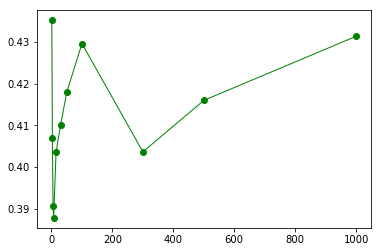

In [9]:
plt.plot(tuning_paras['C'], np.mean(acu_linear, axis=1), 'go-', linewidth=1)
plt.show()

In [10]:
max_ind = np.argmax(cv_acu)
best_c = tuning_paras['C'][max_ind]
print(best_c)

1


In [11]:
start=datetime.now()

svm_linear = svm.LinearSVC(C = best_c).fit(train_featu, train_label)
pred_label = svm_linear.predict(test_featu)
print ("Time:", datetime.now() - start)

total_acu = np.sum(pred_label == test_label) / len(test_label)
print("Total accuracy:", total_acu)

categories = ["air_conditioner", "car_horn", "children_playing",
              "dog_bark", "drilling", "enginge_idling",
              "gun_shot", "jackhammer", "siren", "street_music"]

for i in range(10): 
    acu = np.sum(pred_label[test_label == i] == i) / np.sum(test_label == i)
    print("The accuracy for {0} is {1}".format(categories[i], acu))


Time: 0:00:01.626524
Total accuracy: 0.495468277946
The accuracy for air_conditioner is 0.18181818181818182
The accuracy for car_horn is 0.45714285714285713
The accuracy for children_playing is 0.8048780487804879
The accuracy for dog_bark is 0.35714285714285715
The accuracy for drilling is 0.4666666666666667
The accuracy for enginge_idling is 0.4782608695652174
The accuracy for gun_shot is 0.4857142857142857
The accuracy for jackhammer is 0.3333333333333333
The accuracy for siren is 0.3333333333333333
The accuracy for street_music is 0.7111111111111111


#### SVM with RBF kernel:

In [12]:
acu_rbf = np.empty(shape=(len(tuning_paras['C']), len(tuning_paras['gamma_rbf'])))

for c in range(len(tuning_paras['C'])):
    
    for g in range(len(tuning_paras['gamma_rbf'])):
        
        svm_rbf = svm.SVC(kernel='rbf', C=tuning_paras['C'][c], gamma=tuning_paras['gamma_rbf'][g])
        # Cross-validation with K = 5
        acu_rbf[c][g] = np.mean(cross_val_score(svm_rbf, train_featu, train_label, cv=5))
    
    print("C =", tuning_paras['C'][c], "finished !")
    
print("Accuray:", acu_rbf) 

C = 1 finished !
C = 3 finished !
C = 5 finished !
C = 7 finished !
C = 15 finished !
C = 30 finished !
C = 50 finished !
C = 100 finished !
C = 300 finished !
C = 500 finished !
C = 1000 finished !
Accuray: [[ 0.2503232   0.2503232   0.2503232   0.24774159  0.24774159  0.24774159
   0.24774159  0.24774159  0.24774159  0.24774159  0.24774159  0.24774159
   0.24774159]
 [ 0.2529206   0.2503232   0.2503232   0.2503232   0.24774159  0.24774159
   0.24774159  0.24774159  0.24774159  0.24774159  0.24774159  0.24774159
   0.24774159]
 [ 0.2529206   0.2503232   0.2503232   0.2503232   0.24774159  0.24774159
   0.24774159  0.24774159  0.24774159  0.24774159  0.24774159  0.24774159
   0.24774159]
 [ 0.2529206   0.2503232   0.2503232   0.2503232   0.24774159  0.24774159
   0.24774159  0.24774159  0.24774159  0.24774159  0.24774159  0.24774159
   0.24774159]
 [ 0.2529206   0.2503232   0.2503232   0.2503232   0.24774159  0.24774159
   0.24774159  0.24774159  0.24774159  0.24774159  0.24774159  0.2

In [13]:
best_c = tuning_paras['C'][np.unravel_index(acu_rbf.argmax(), acu_rbf.shape)[0]]
best_gamma = tuning_paras['gamma_rbf'][np.unravel_index(acu_rbf.argmax(), acu_rbf.shape)[1]]
print(best_c)
print(best_gamma)

3
0.01


In [14]:
start=datetime.now()

svm_rbf = svm.SVC(kernel='rbf', C = best_c, gamma = best_gamma).fit(train_featu, train_label)
pred_label = svm_rbf.predict(test_featu)
print ("Time:", datetime.now() - start)

total_acu = np.sum(pred_label == test_label) / len(test_label)
print("Total accuracy:", total_acu)

categories = ["air_conditioner", "car_horn", "children_playing",
              "dog_bark", "drilling", "enginge_idling",
              "gun_shot", "jackhammer", "siren", "street_music"]

for i in range(10): 
    acu = np.sum(pred_label[test_label == i] == i) / np.sum(test_label == i)
    print("The accuracy for {0} is {1}".format(categories[i], acu))

Time: 0:00:00.431110
Total accuracy: 0.256797583082
The accuracy for air_conditioner is 0.0
The accuracy for car_horn is 0.0
The accuracy for children_playing is 0.0
The accuracy for dog_bark is 1.0
The accuracy for drilling is 0.0
The accuracy for enginge_idling is 0.0
The accuracy for gun_shot is 0.02857142857142857
The accuracy for jackhammer is 0.0
The accuracy for siren is 0.0
The accuracy for street_music is 0.0


#### SVM with polynomial kernel (degree = 3):

In [15]:
acu_poly = np.empty(shape=(len(tuning_paras['C_poly']), len(tuning_paras['gamma_poly'])))

for c in range(len(tuning_paras['C_poly'])):
    
    for g in range(len(tuning_paras['gamma_poly'])):
        
        svm_poly = svm.SVC(kernel='poly', degree=3, C=tuning_paras['C_poly'][c], gamma=tuning_paras['gamma_poly'][g])
        # Cross-validation with K = 5
        acu_poly[c][g] = np.mean(cross_val_score(svm_poly, train_featu, train_label, cv=5))
        #print("gamma =", tuning_paras['gamma_poly'][g], "finished !")
    
    print("C =", tuning_paras['C_poly'][c], "finished !")
    
print("Accuray:", acu_poly) 

C = 1 finished !
C = 2 finished !
C = 3 finished !
C = 4 finished !
C = 5 finished !
C = 6 finished !
C = 7 finished !
C = 9 finished !
C = 11 finished !
C = 15 finished !
C = 30 finished !
C = 50 finished !
C = 70 finished !
C = 100 finished !
Accuray: [[ 0.52021581  0.52021581  0.52021581  0.52021581  0.52021581  0.52021581
   0.52021581]
 [ 0.52021581  0.52021581  0.52021581  0.52021581  0.52021581  0.52021581
   0.52021581]
 [ 0.52021581  0.52021581  0.52021581  0.52021581  0.52021581  0.52021581
   0.52021581]
 [ 0.52021581  0.52021581  0.52021581  0.52021581  0.52021581  0.52021581
   0.52021581]
 [ 0.52021581  0.52021581  0.52021581  0.52021581  0.52021581  0.52021581
   0.52021581]
 [ 0.52021581  0.52021581  0.52021581  0.52021581  0.52021581  0.52021581
   0.52151451]
 [ 0.52021581  0.52021581  0.52021581  0.52021581  0.52021581  0.52021581
   0.52021581]
 [ 0.52021581  0.52021581  0.52021581  0.52021581  0.52021581  0.52021581
   0.52021581]
 [ 0.52021581  0.52021581  0.52021

In [16]:
best_c = tuning_paras['C_poly'][np.unravel_index(acu_poly.argmax(), acu_poly.shape)[0]]
best_gamma = tuning_paras['gamma_poly'][np.unravel_index(acu_poly.argmax(), acu_poly.shape)[1]]
print(best_c)
print(best_gamma)

6
0.2


In [17]:
start=datetime.now()

svm_poly = svm.SVC(kernel='poly', C = best_c, gamma = best_gamma).fit(train_featu, train_label)
pred_label = svm_poly.predict(test_featu)
print ("Time:", datetime.now() - start)

total_acu = np.sum(pred_label == test_label) / len(test_label)
print("Total accuracy:", total_acu)

categories = ["air_conditioner", "car_horn", "children_playing",
              "dog_bark", "drilling", "enginge_idling",
              "gun_shot", "jackhammer", "siren", "street_music"]

for i in range(10): 
    acu = np.sum(pred_label[test_label == i] == i) / np.sum(test_label == i)
    print("The accuracy for {0} is {1}".format(categories[i], acu))

Time: 0:00:00.986102
Total accuracy: 0.519637462236
The accuracy for air_conditioner is 0.2727272727272727
The accuracy for car_horn is 0.5714285714285714
The accuracy for children_playing is 0.6097560975609756
The accuracy for dog_bark is 0.5833333333333334
The accuracy for drilling is 0.36666666666666664
The accuracy for enginge_idling is 0.17391304347826086
The accuracy for gun_shot is 0.7428571428571429
The accuracy for jackhammer is 0.4166666666666667
The accuracy for siren is 0.4
The accuracy for street_music is 0.5111111111111111
